#### Logistic regression can be used to predict two/more categories. but here I am implementing it to classify only 2 classes. Its also known ad Binary classification and Logistic Regression is one of the most famous classification algorithm

#### The logistic regression algorithm assumes that the 2 classes are linearly separable so I am using an inbuilt scikit learn dataset for this implementataion which is linearly separable.

In [29]:
#imports
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X,y=make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2, random_state=1, n_clusters_per_class=1)

In [30]:
# implementing the sigmoid function:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [31]:
# implementing loss function
def loss_fn(y,y_hat):
    loss=-np.mean(y*(np.log(y_hat))-(1-y)*np.log(1-y_hat))
    return loss

In [32]:
# defining gradient descent function
def gradient(X,y,y_hat):
    m=X.shape[0]
    dw=(1/m)*np.dot(X.T,(y_hat-y))
    db=(1/m)*np.sum((y_hat-y))
    return dw,db

In [38]:
# defining decision boundary function
# The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving it I find m and c
def decision_bound(X,w,b):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c

    # plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'o-')

In [39]:
# function to normalize the values
def normalize(a):
    n=a.shape[1]
    for i in range(n):
        a=(a-a.mean(axis=0))/a.std(axis=0)
    return a

In [40]:
# implementing the train function
# This initializes bias,weights and train with mini batch gradient descent where we specify batch size
def train(X,y,batch_size,epochs,lr):
    m,n=X.shape
    w=np.zeros((n,1))
    b=0
    #reshape y for easy calculation
    y=y.reshape(m,1)
    x=normalize(X)
    loss=[]
    for i in range(epochs):
        for j in range((m-1)//batch_size+1):
            # defining batch for SGD
            start=j*batch_size
            end=start+batch_size
            xbt=X[start:end]
            ybt=y[start:end]
            y_hat=sigmoid(np.dot(xbt,w)+b)
            dw,db=gradient(xbt,ybt,y_hat)
            #updating weight and bias
            w-=lr*dw
            b-=lr*db
        l=loss_fn(y,sigmoid(np.dot(X,w)+b))
        loss.append(l)
    return w,b,loss


In [41]:
# Predict function
def predict(X):
    x = normalize(X)
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

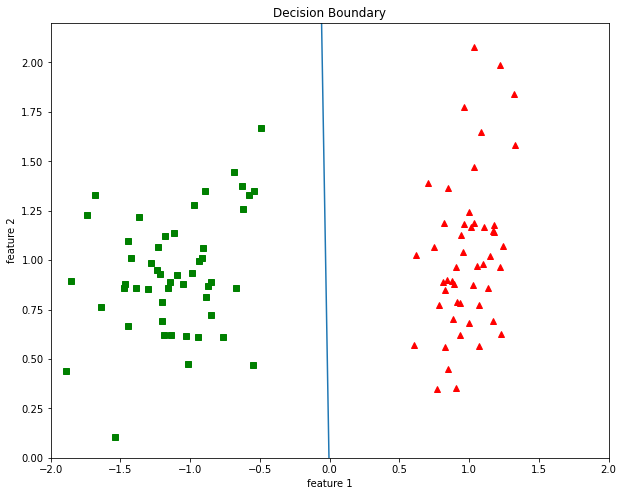

In [42]:
# Training 
w, b, l = train(X, y, batch_size=100, epochs=1000, lr=0.01)
# plot the decision boundary
decision_bound(X, w, b)

In [49]:
# checking accuracy
preds=predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y,preds)
    

1.0

#### As it is clear from figure we get 100% accuracy

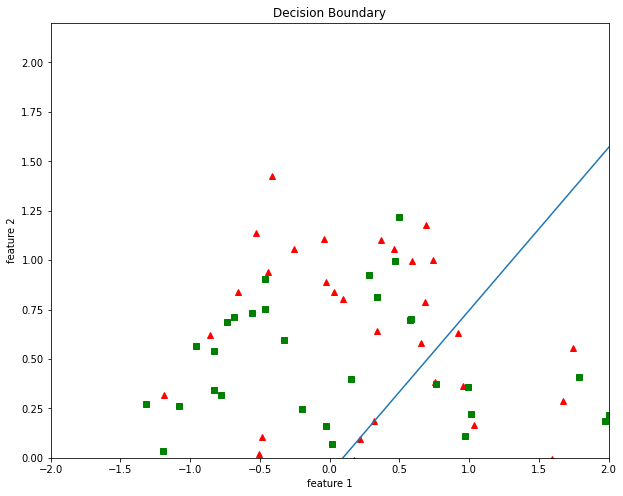

In [54]:
#Checking accuracy on non separacble dataset
from sklearn.datasets import make_moons
X1, y1 = make_moons(n_samples=100,noise=0.20)

w1, b1, l1 = train(X, y, batch_size=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
decision_bound(X1, w1, b1)

In [55]:
preds1=predict(X1)
accuracy_score(y1,preds1)


0.86

In [56]:
# Here we are getting less accuracy as expected